In [78]:
import numpy as np
import pandas as pd
from utils import *
import torch
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.stats import pearsonr

In [79]:
np.random.seed(1)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
def plot_mask_corr(mask, pattern_name):
    num_features = mask.shape[1]
    
    var_cols = np.std(mask, axis=0) > 0
    mask = mask[:, var_cols]
    original_indices = np.where(var_cols)[0]
    
    # --- Step 2: Check if there are enough features left to correlate ---
    
    num_features = mask.shape[1]
    p_value_matrix = np.zeros((num_features, num_features))
    for i in range(num_features):
        for j in range(i+1,num_features):
            feat1mask = mask[:, i]
            feat2mask = mask[:, j]        
            rho, p_value = pearsonr(feat1mask.astype(float), feat2mask.astype(float))
            p_value_matrix[i, j] = p_value
            p_value_matrix[j, i] = p_value
    plt.figure(figsize=(12, 10))
    mask_upper = np.triu(np.ones_like(p_value_matrix, dtype=bool), k=0)
    bonferroni_thresh = 0.05/(num_features*(num_features-1))
    cmap = ListedColormap(['#d84315', '#ffb74d','#e0e0e0'])  
    norm = BoundaryNorm([0, bonferroni_thresh, 0.05, 1], ncolors=cmap.N)
    sns.heatmap(p_value_matrix, 
                mask=mask_upper, 
                annot=True, 
                fmt=".2e", 
                cmap=cmap,
                norm=norm,
                linewidths=.5,
               cbar_kws={'format': '%.4f'},
               xticklabels=original_indices,
                yticklabels=original_indices)
    
    plt.title('Lower Triangular Heatmap of P-values for {} Mask Correlation'.format(pattern_name), fontsize=16)
    plt.xlabel('Feature Index', fontsize=12)
    plt.ylabel('Feature Index', fontsize=12)
    plt.show()

In [147]:
def plot_mask_corr(mask, pattern_name):

    num_initial_features = mask.shape[1]

    # --- Step 1: Filter out constant columns ---
    var_cols = np.std(mask, axis=0) > 0
    mask = mask[:, var_cols]
    original_indices = np.where(var_cols)[0]

    # --- Step 2: Check if there are enough features left to correlate ---
    num_features = mask.shape[1]
    if num_features < 2:
        print("Not enough variable features to perform correlation analysis (at least 2 required).")
        return

    p_value_matrix = np.zeros((num_features, num_features))
    rho_matrix = np.zeros((num_features, num_features))

    for i in range(num_features):
        for j in range(i + 1, num_features):
            feat1mask = mask[:, i]
            feat2mask = mask[:, j]
            rho, p_value = pearsonr(feat1mask.astype(float), feat2mask.astype(float))
            p_value_matrix[i, j] = p_value
            p_value_matrix[j, i] = p_value  # Symmetric matrix
            rho_matrix[i, j] = rho
            rho_matrix[j, i] = rho  # Symmetric matrix

    fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Adjusted figure size for two plots

    # --- Plotting P-values ---
    mask_upper = np.triu(np.ones_like(p_value_matrix, dtype=bool), k=0)
    bonferroni_thresh = 0.05 / (num_initial_features * (num_initial_features - 1)) # Use initial features for Bonferroni
    cmap_p = ListedColormap(['#d84315', '#ffb74d', '#e0e0e0'])
    norm_p = BoundaryNorm([0, bonferroni_thresh, 0.05, 1], ncolors=cmap_p.N)

    sns.heatmap(p_value_matrix,
                mask=mask_upper,
                annot=True,
                fmt=".2e",
                cmap=cmap_p,
                norm=norm_p,
                linewidths=.5,
                cbar_kws={'format': '%.4f'},
                xticklabels=original_indices,
                yticklabels=original_indices,
                ax=axes[0]) # Specify ax for subplot
    axes[0].set_title('P-values for {} Mask Correlation'.format(pattern_name), fontsize=14)
    axes[0].set_xlabel('Feature Index', fontsize=12)
    axes[0].set_ylabel('Feature Index', fontsize=12)

    # --- Plotting Pearson Rho values ---
    rho_colors = ['#d84315', '#ffb74d', '#e0e0e0', '#ffb74d', '#d84315']
    rho_cmap = ListedColormap(rho_colors)
    rho_norm = BoundaryNorm([-1, -0.5, -0.3, 0.3, 0.5, 1], ncolors=rho_cmap.N)

    sns.heatmap(rho_matrix,
                mask=mask_upper, # Use the same mask for upper triangle
                annot=True,
                fmt=".2f",
                cmap=rho_cmap,
                norm=rho_norm,
                linewidths=.5,
                cbar_kws={'format': '%.2f'},
                xticklabels=original_indices,
                yticklabels=original_indices,
                ax=axes[1]) # Specify ax for subplot
    axes[1].set_title('Pearson Rho for {} Mask Correlation'.format(pattern_name), fontsize=14)
    axes[1].set_xlabel('Feature Index', fontsize=12)
    axes[1].set_ylabel('Feature Index', fontsize=12)

    plt.suptitle('Mask Correlation Analysis for {} ({} features)'.format(pattern_name, num_initial_features), fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

In [148]:
# # from simulate import simulate_nan

# for i in range(1):
#     X_miss_mcar = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR", structured=True, weak=False, sequential=True)
#     X_mcar = X_miss_mcar['X_incomp']
#     R_mcar = X_miss_mcar['mask']

# print("Percentage of newly generated missing values: ", (R_mcar.sum())/np.prod(R_mcar.shape)*100, " %")
# ax = sns.heatmap(X_mcar, mask=R_mcar==1, linewidths=0.005, linecolor='black')

In [181]:
num_tests = range(1)
# X_complete_cont = np.random.rand(10000, 10)
X_complete_cont = np.random.rand(100, 10)

In [150]:
from simulate import simulate_nan

# MCAR

### MCAR Unstructured (I)

Percentage of newly generated missing values:  39.921  %


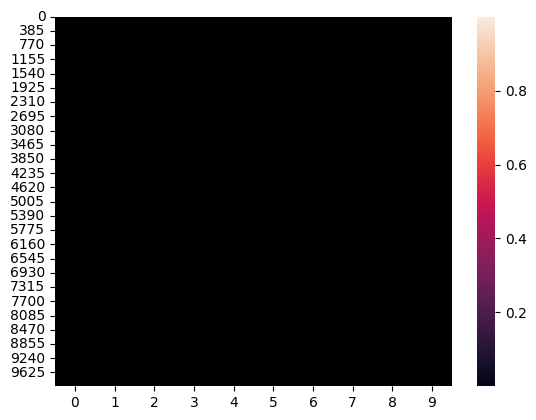

In [156]:
for i in num_tests:
    X_miss_mcar_U = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR")

    X_mcar_U = X_miss_mcar_U['X_incomp']
    R_mcar_U = X_miss_mcar_U['mask']

print("Percentage of newly generated missing values: ", (R_mcar_U.sum())/np.prod(R_mcar_U.shape)*100, " %")
ax = sns.heatmap(X_mcar_U, mask=R_mcar_U==1, linewidths=0.005, linecolor='black')

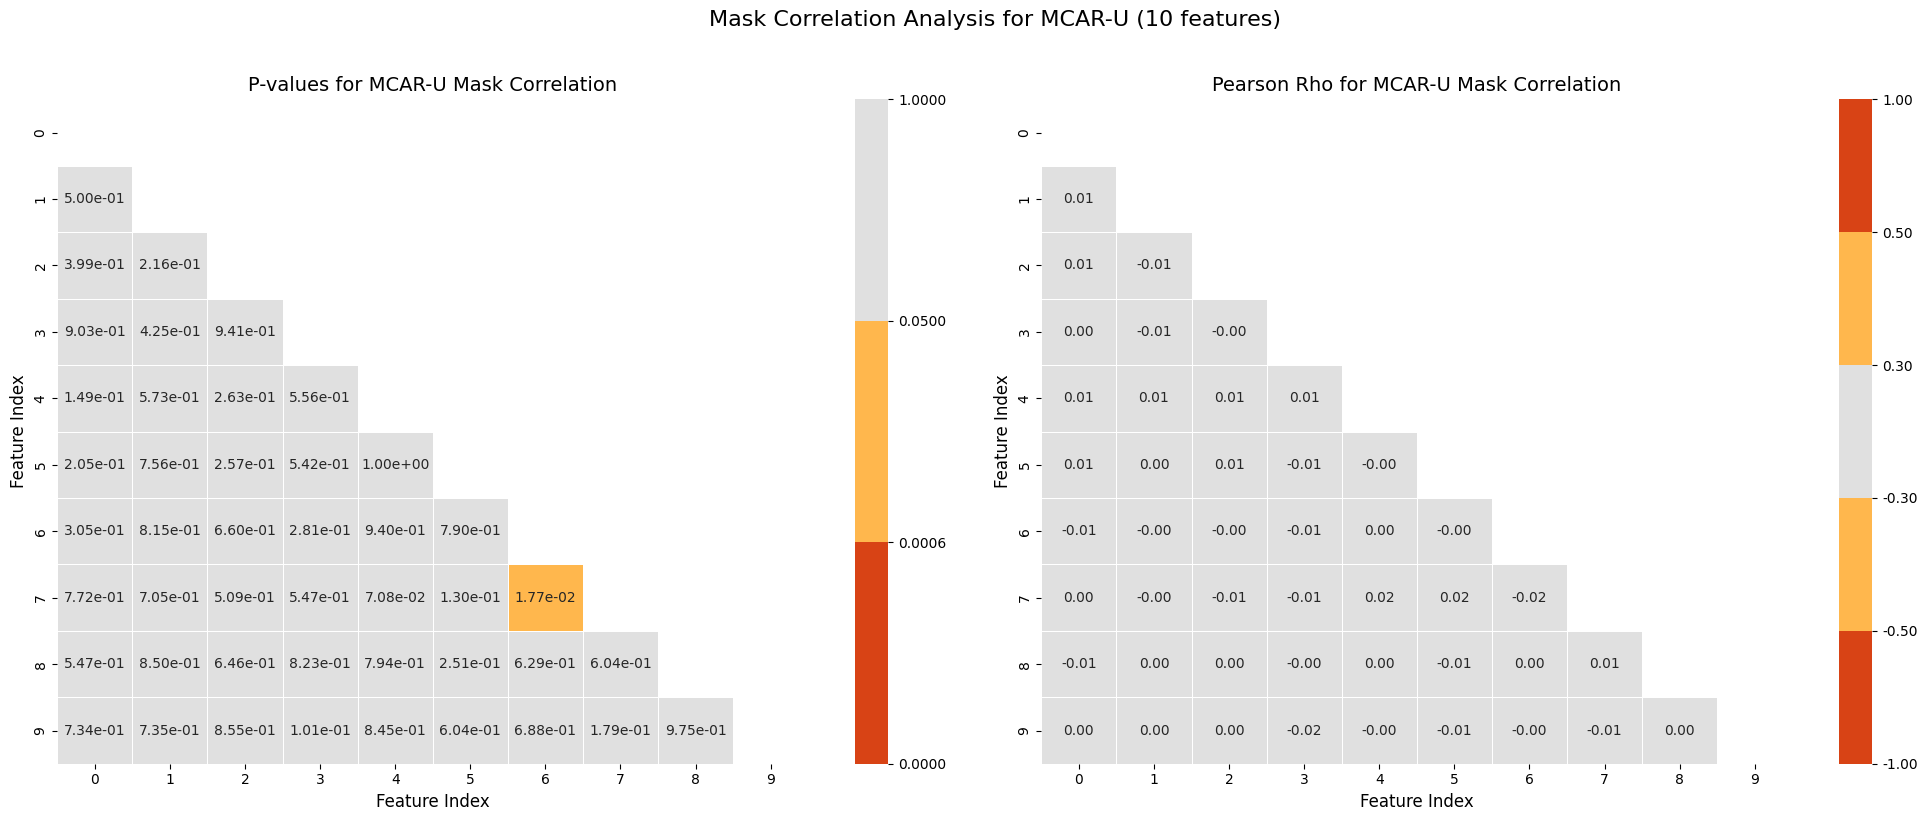

In [157]:
plot_mask_corr(R_mcar_U, "MCAR-U")

### MCAR Structured

#### MCAR WS-Block (II)

coeffs  [[2]]
coeffs  [[-2]]
coeffs  [[2]]
coeffs  [[-2]]
coeffs  [[2]]
coeffs  [[-2]]
coeffs  [[2]]
coeffs  [[-2]]
coeffs  [[2]]
coeffs  [[-2]]
Percentage of newly generated missing values:  39.6  %


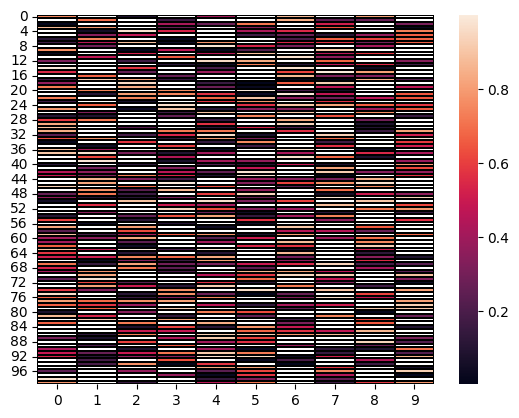

In [286]:
for i in num_tests:
    betas = iter([2, -2, 2, -2, 2, -2, 2, -2, 2, -2])
    X_miss_mcar_WSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR", structured=True, weak=True, sequential=False,dist="betas",arg0=betas)
    # X_miss_mcar_WSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR", structured=True, weak=True, sequential=False,dist="normal",arg0=0,arg1=2)
    X_mcar_WSB = X_miss_mcar_WSB['X_incomp']
    R_mcar_WSB = X_miss_mcar_WSB['mask']

print("Percentage of newly generated missing values: ", (R_mcar_WSB.sum())/np.prod(R_mcar_WSB.shape)*100, " %")
ax = sns.heatmap(X_mcar_WSB, mask=R_mcar_WSB==1, linewidths=0.005, linecolor='black')

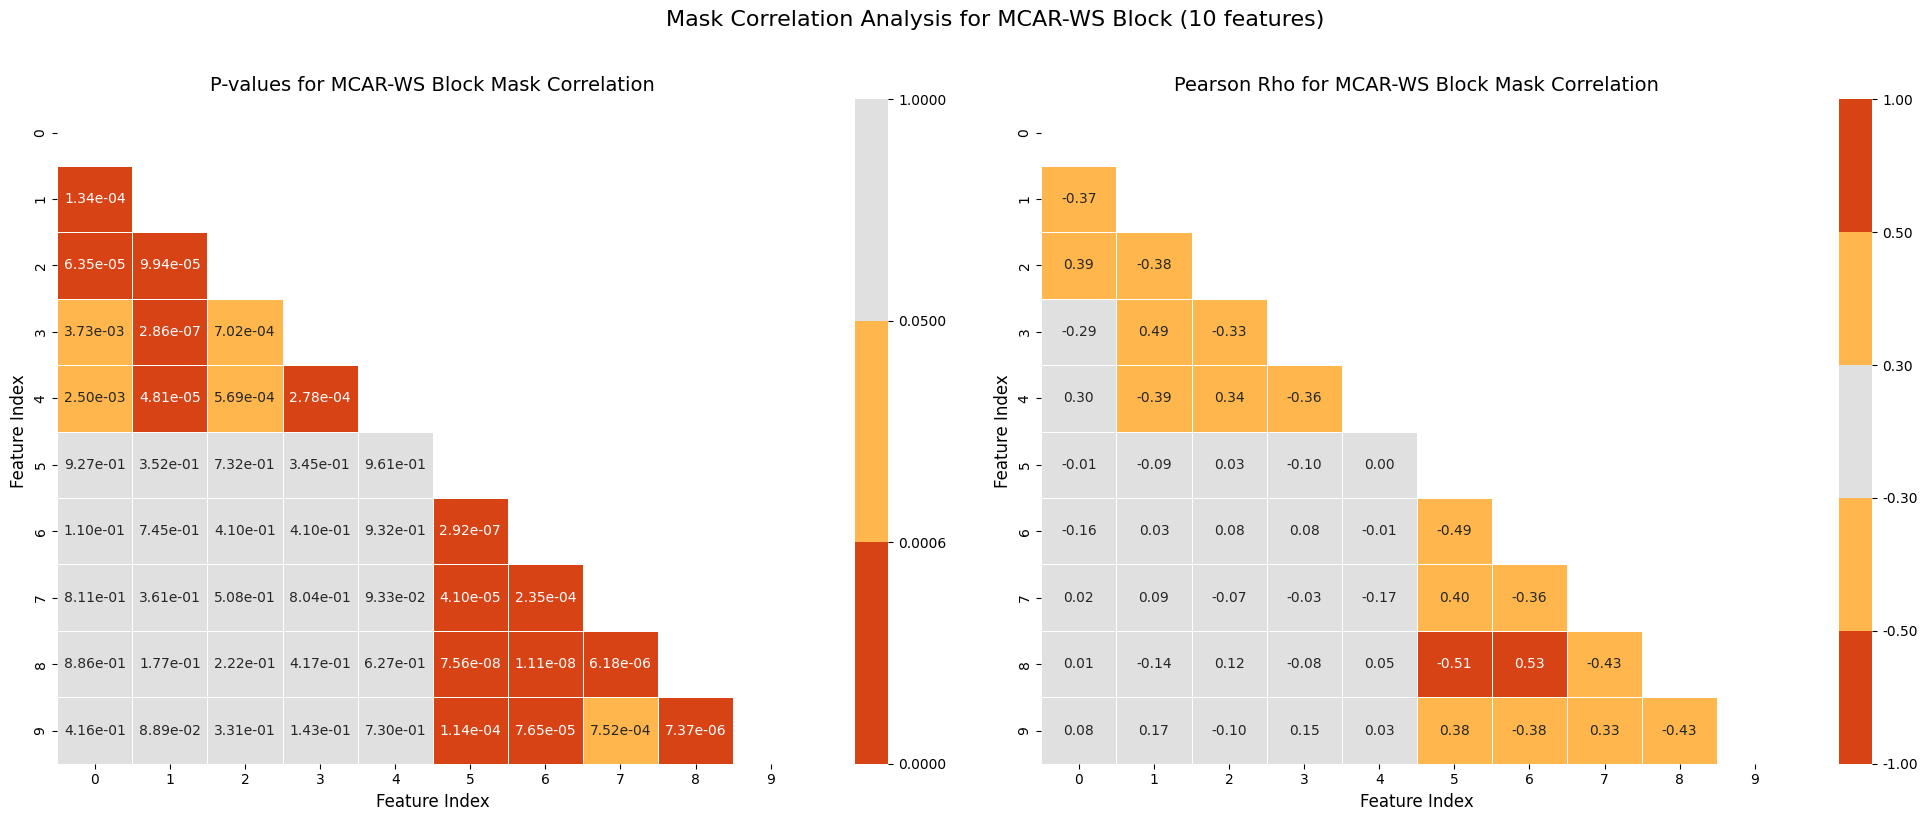

In [287]:
plot_mask_corr(R_mcar_WSB, "MCAR-WS Block")

#### MCAR SS-Block (III)

coeffs  [[1.55230819]]
coeffs  [[2.25501796]]
coeffs  [[-0.94599441]]
coeffs  [[-0.32595885]]
coeffs  [[0.76681373]]
coeffs  [[4.28822771]]
coeffs  [[-1.5724763]]
coeffs  [[2.10453871]]
coeffs  [[-2.2420706]]
coeffs  [[-0.1318139]]
Percentage of newly generated missing values:  40.0  %


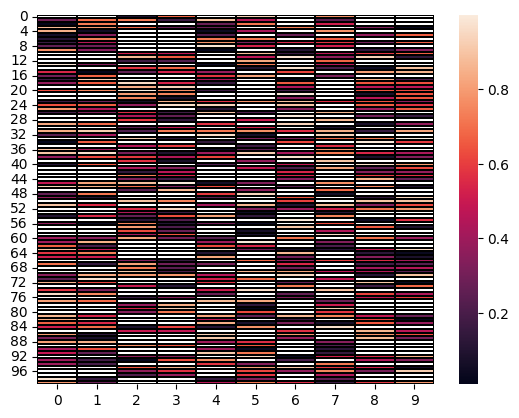

In [290]:
for i in num_tests:
    betas = iter([2, -1, -2, 2, -2, -2, 2, -2, 2, -2])
    X_miss_mcar_SSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR", structured=True, weak=False, sequential=False,dist="normal",arg0=0, arg1=2)
    # X_miss_mcar_SSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR", structured=True, weak=False, sequential=False,dist="betas",arg0=betas)
    
    
    X_mcar_SSB = X_miss_mcar_SSB['X_incomp']
    R_mcar_SSB = X_miss_mcar_SSB['mask']

print("Percentage of newly generated missing values: ", (R_mcar_SSB.sum())/np.prod(R_mcar_SSB.shape)*100, " %")
ax = sns.heatmap(X_mcar_SSB, mask=R_mcar_SSB==1, linewidths=0.005, linecolor='black')

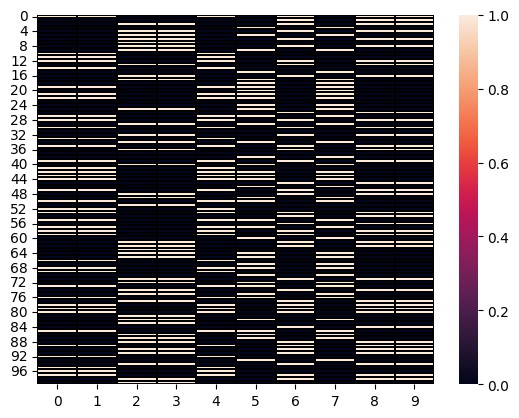

In [292]:
ax = sns.heatmap(R_mcar_SSB==1, linewidths=0.005, linecolor='black')

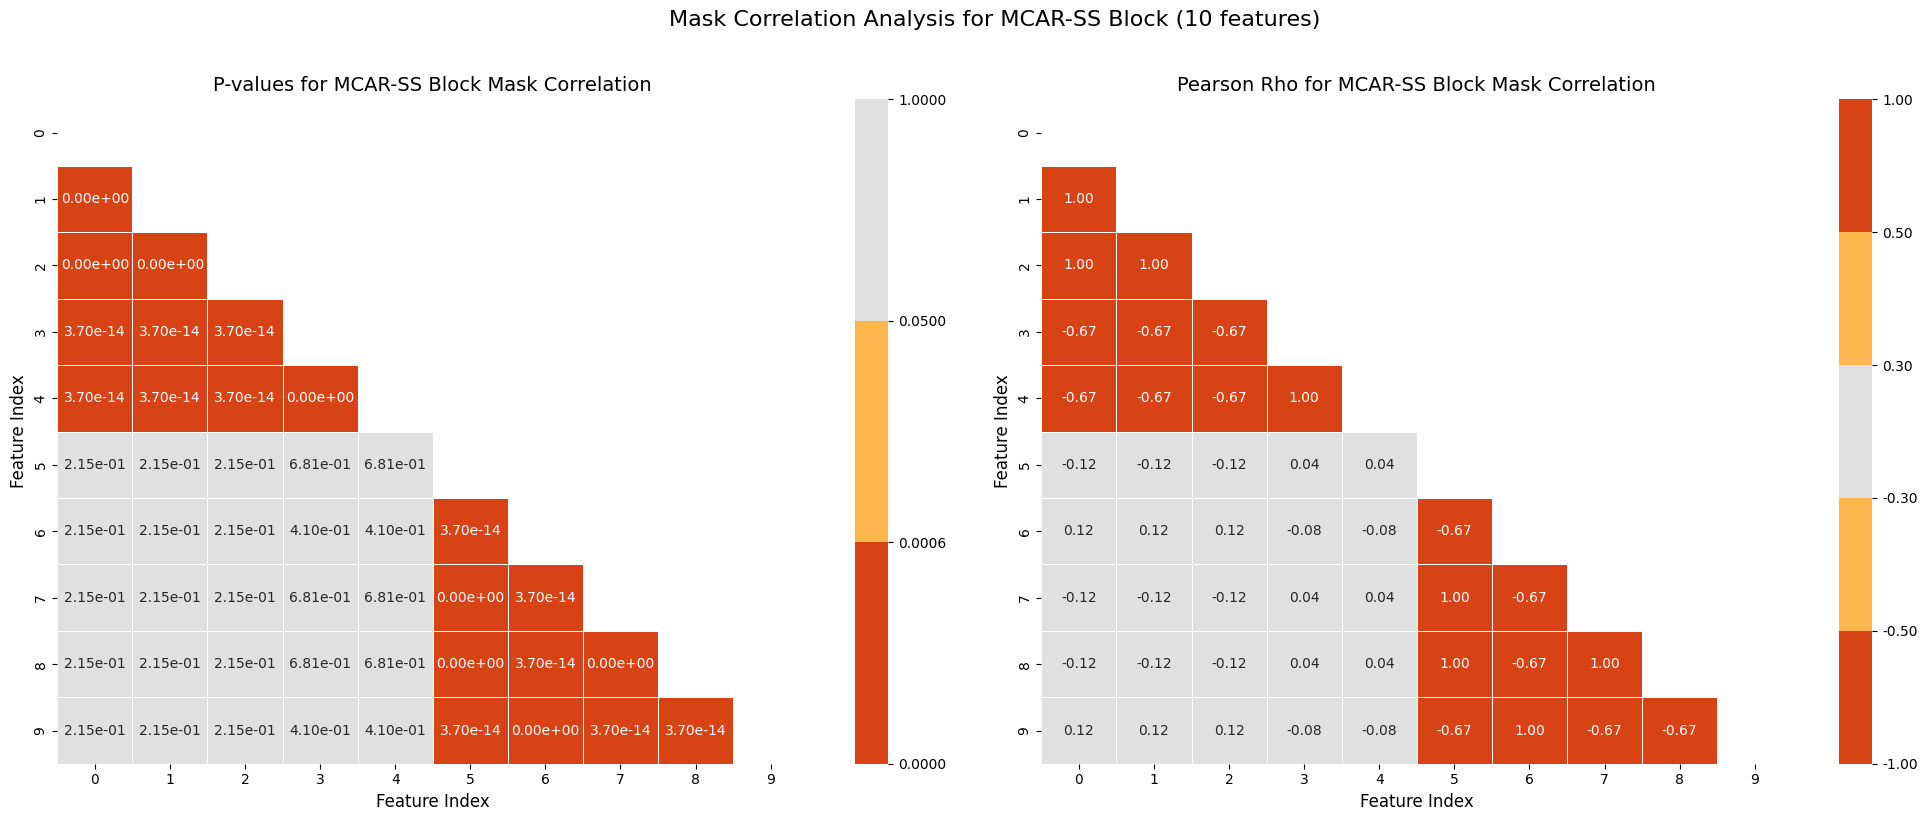

In [280]:
plot_mask_corr(R_mcar_SSB, "MCAR-SS Block")

#### MCAR WS-Sequential (IV)

Percentage of newly generated missing values:  40.2  %


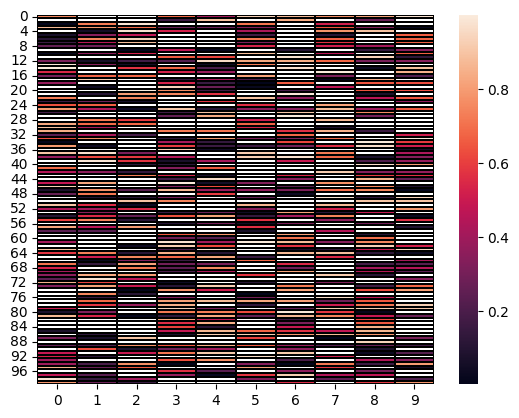

In [281]:
for i in num_tests:
    X_miss_mcar_WSS = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR", structured=True, weak=True, sequential=True,dist="normal",arg0=0,arg1=2)

    X_mcar_WSS = X_miss_mcar_WSS['X_incomp']
    R_mcar_WSS = X_miss_mcar_WSS['mask']

print("Percentage of newly generated missing values: ", (R_mcar_WSS.sum())/np.prod(R_mcar_WSS.shape)*100, " %")
ax = sns.heatmap(X_mcar_WSS, mask=R_mcar_WSS==1, linewidths=0.005, linecolor='black')

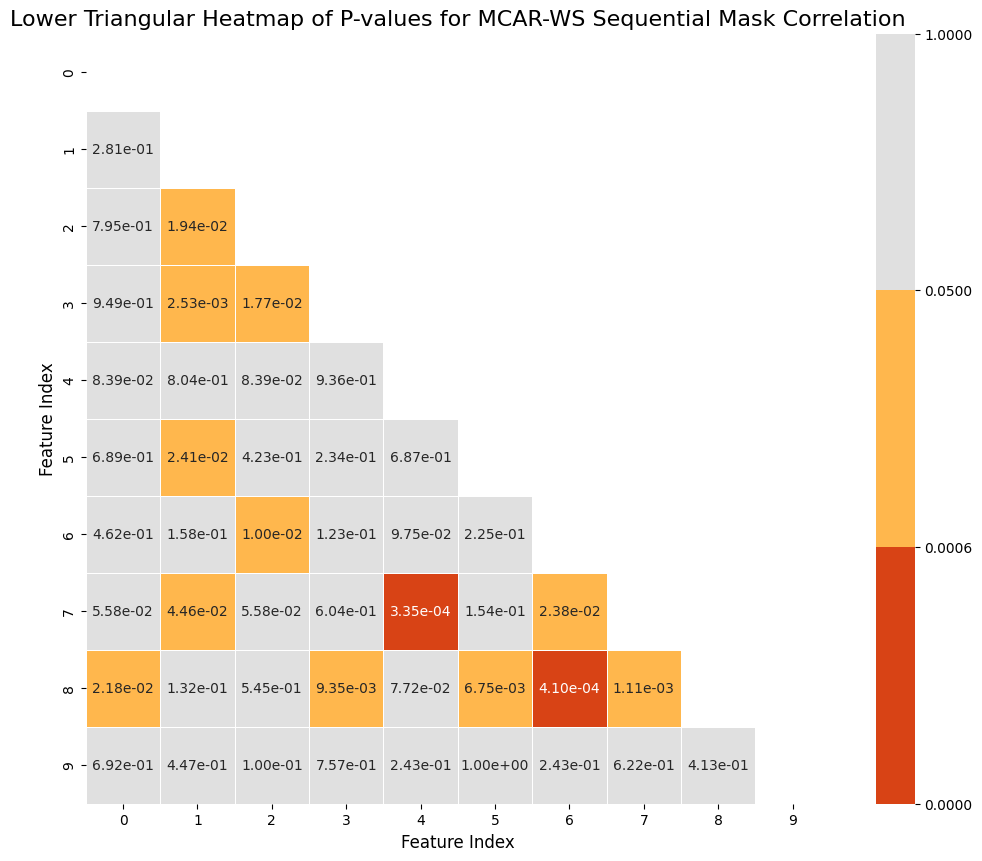

In [786]:
plot_mask_corr(R_mcar_WSS, "MCAR-WS Sequential")

#### MCAR SS-Sequential (V)

coeffs  [[0.47027597]]
inputs  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]
ic  [[0.        ]
 [0.        ]
 [0.        ]
 [0.47027597]
 [0.47027597]
 [0.47027597]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.47027597]
 [0.47027597]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.47027597]
 [0.        ]
 [0.47027597]
 [0.47027597]
 [0.47027597]
 [0.47027597]
 [0.47027597]
 [0.        ]


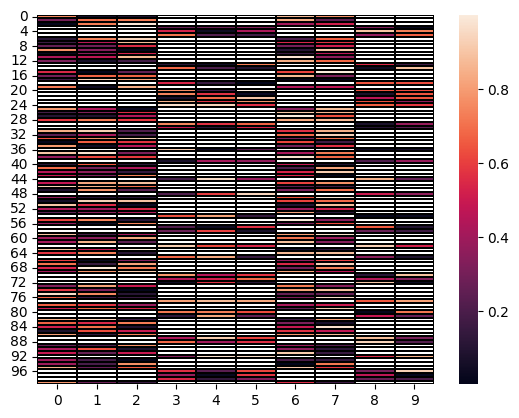

In [282]:
j = 0
for i in num_tests:
    betas = iter([2, -2, -2, 2, -2, -2, 2, -2, 2, -2])
    X_miss_mcar_SSS = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MCAR", structured=True, weak=False, sequential=True, dist="normal", arg0=0, arg1=2)

    X_mcar_SSS = X_miss_mcar_SSS['X_incomp']
    R_mcar_SSS = X_miss_mcar_SSS['mask']

#print(j/len(num_tests))
print("Percentage of newly generated missing values: ", (R_mcar_SSS.sum())/np.prod(R_mcar_SSS.shape)*100, " %")
ax = sns.heatmap(X_mcar_SSS, mask=R_mcar_SSS==1, linewidths=0.005, linecolor='black')

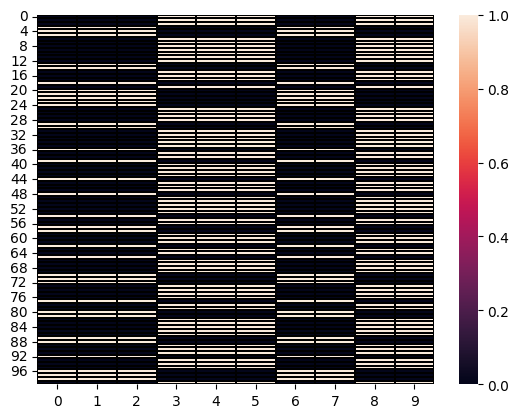

In [283]:
ax = sns.heatmap(R_mcar_SSS==1, linewidths=0.005, linecolor='black')

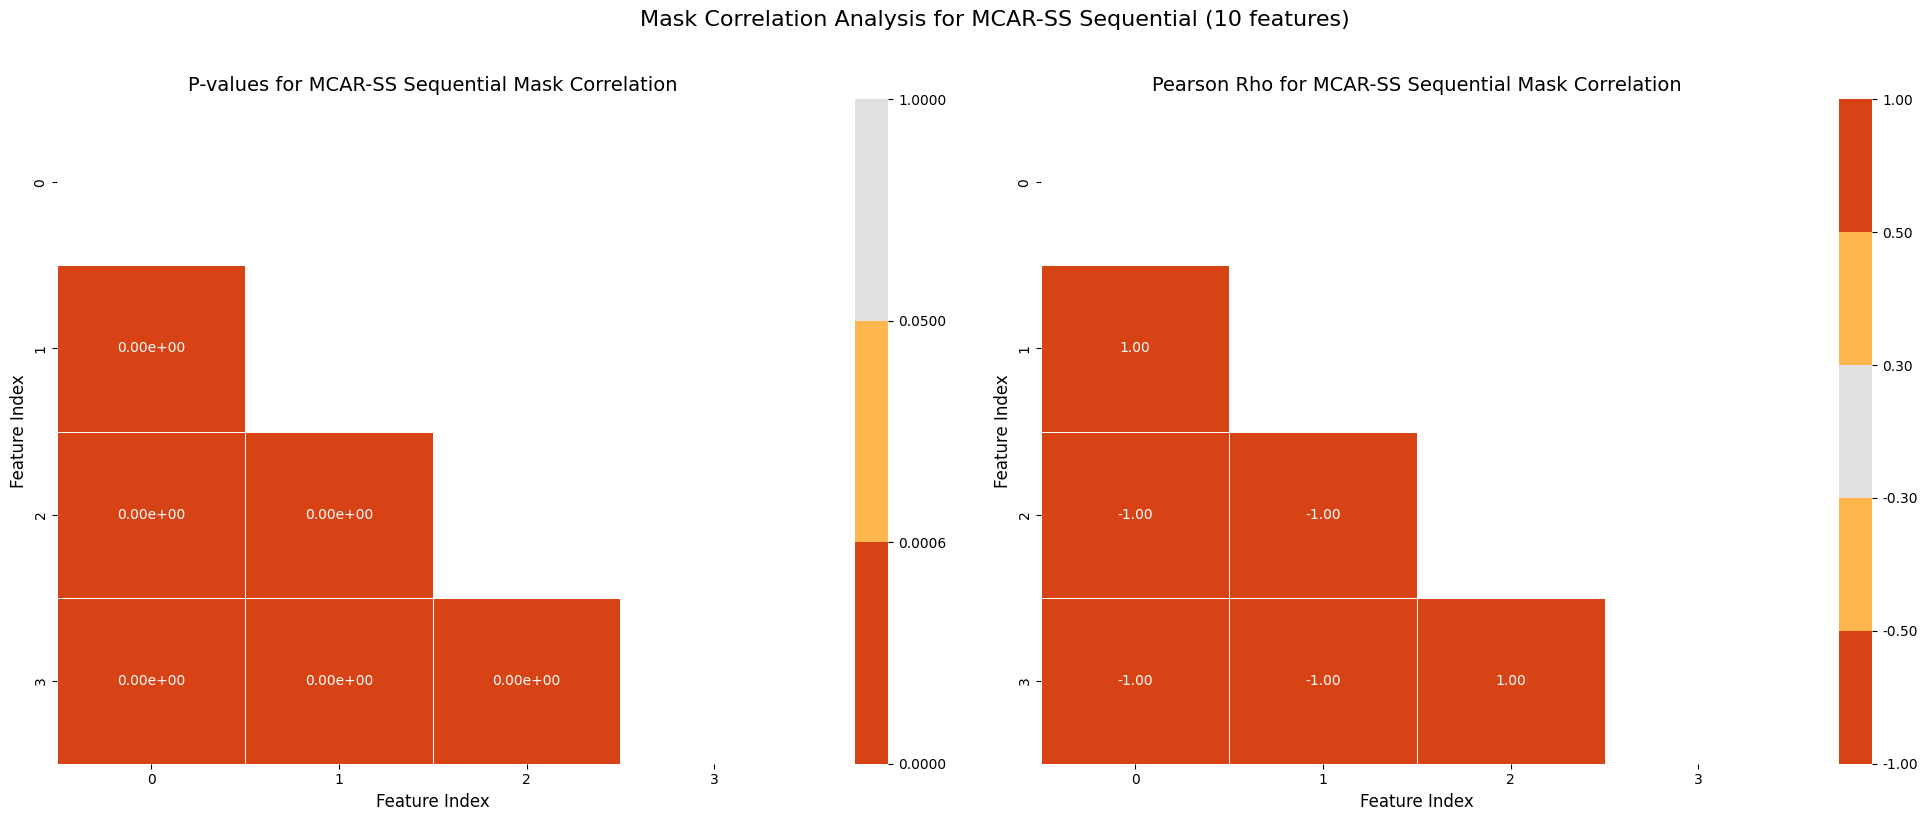

In [197]:
plot_mask_corr(R_mcar_SSS, "MCAR-SS Sequential")

# MAR

### MAR Unstructured

#### MAR Unstructured-Prob. (VI)

Percentage of generated missing values:  20.599999999999998  %


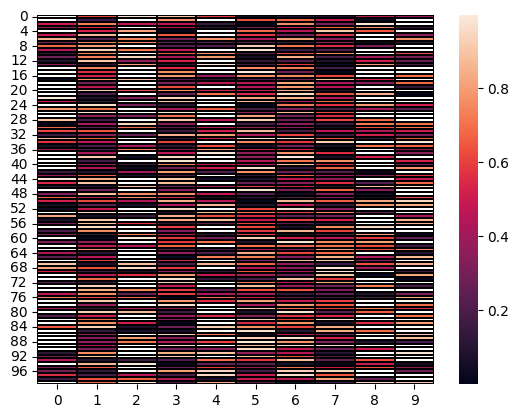

In [817]:
for i in num_tests:
    X_miss_mar_UP = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MAR", p_obs=0.5)

    X_mar_UP = X_miss_mar_UP['X_incomp']
    R_mar_UP = X_miss_mar_UP['mask']

print("Percentage of generated missing values: ", (R_mar_UP.sum())/np.prod(R_mar_UP.shape)*100, " %")

ax = sns.heatmap(X_mar_UP, mask=R_mar_UP==1, linewidths=0.005, linecolor='black')

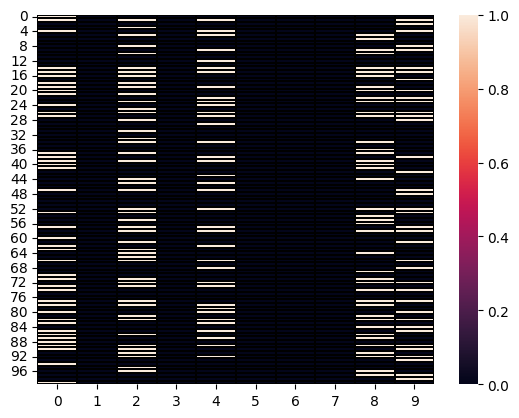

In [819]:
ax = sns.heatmap(R_mar_UP, linewidths=0.005, linecolor='black')

In [818]:
R_mar_UP[:, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

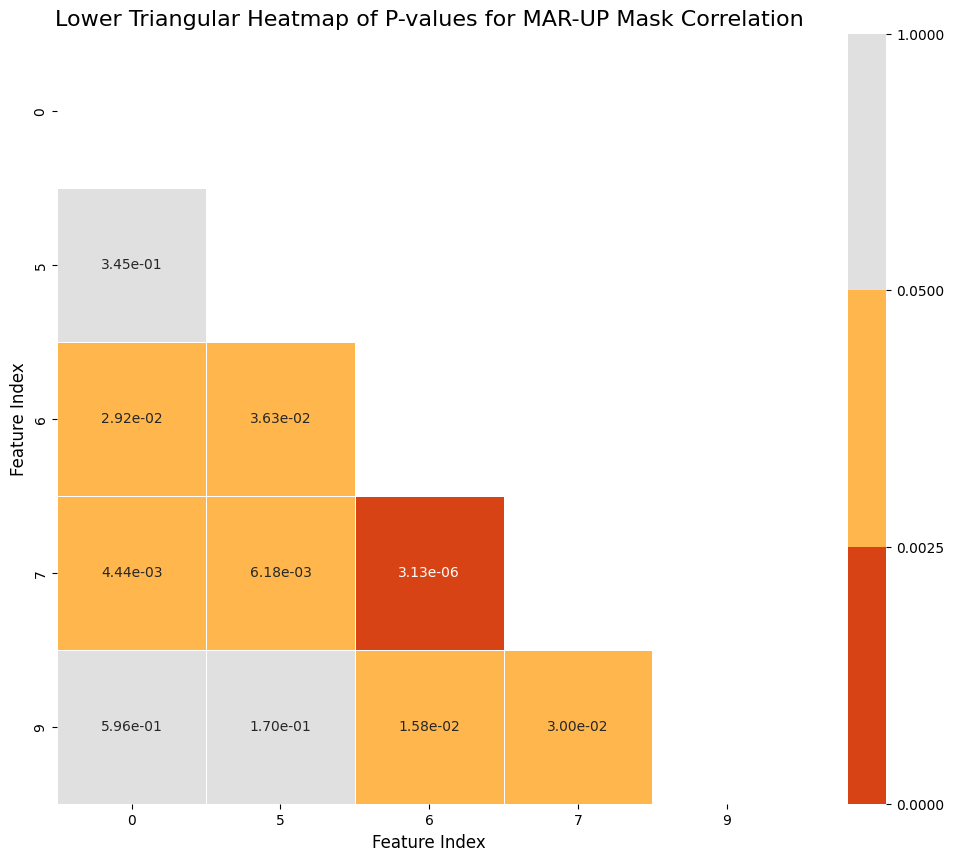

In [790]:
plot_mask_corr(R_mar_UP, "MAR-UP")

#### MAR Unstructured-Det. (VII)

Percentage of generated missing values:  20.0  %


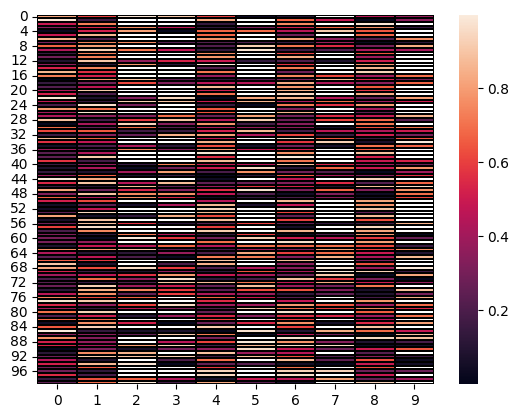

In [791]:
for i in num_tests:
    X_miss_mar_UD = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MAR", weak=False, p_obs=0.5)

    X_mar_UD = X_miss_mar_UD['X_incomp']
    R_mar_UD = X_miss_mar_UD['mask']

print("Percentage of generated missing values: ", (R_mar_UD.sum())/np.prod(R_mar_UD.shape)*100, " %")

ax = sns.heatmap(X_mar_UD, mask=R_mar_UD==1, linewidths=0.005, linecolor='black')

In [792]:
R_mar_UD[:, 3]

array([0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.])

In [793]:
R_mar_UD[:, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

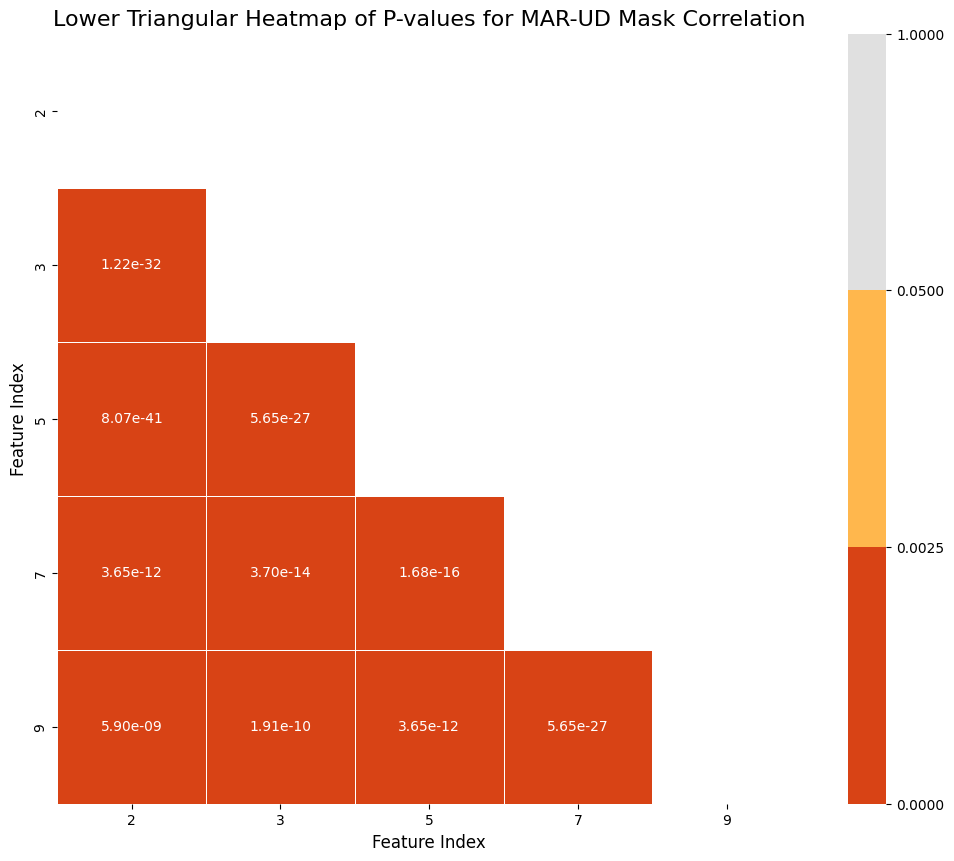

In [794]:
plot_mask_corr(R_mar_UD, "MAR-UD")

### MAR Structured

#### MAR WS-Block (VIII)

Percentage of generated missing values:  19.5  %


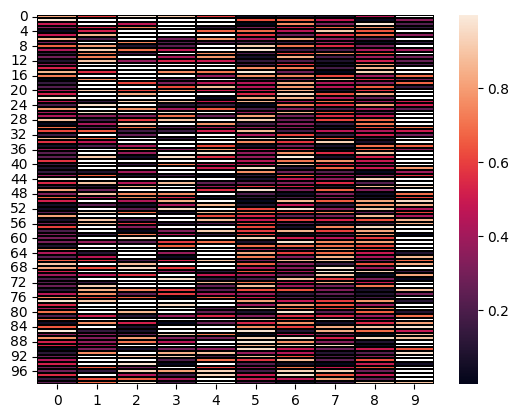

In [795]:
for i in num_tests:
    X_miss_mar_WSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MAR", p_obs=0.5, structured=True, weak=True, sequential=False)

    X_mar_WSB = X_miss_mar_WSB['X_incomp']
    R_mar_WSB = X_miss_mar_WSB['mask']

print("Percentage of generated missing values: ", (R_mar_WSB.sum())/np.prod(R_mar_WSB.shape)*100, " %")

ax = sns.heatmap(X_mar_WSB, mask=R_mar_WSB==1, linewidths=0.005, linecolor='black')

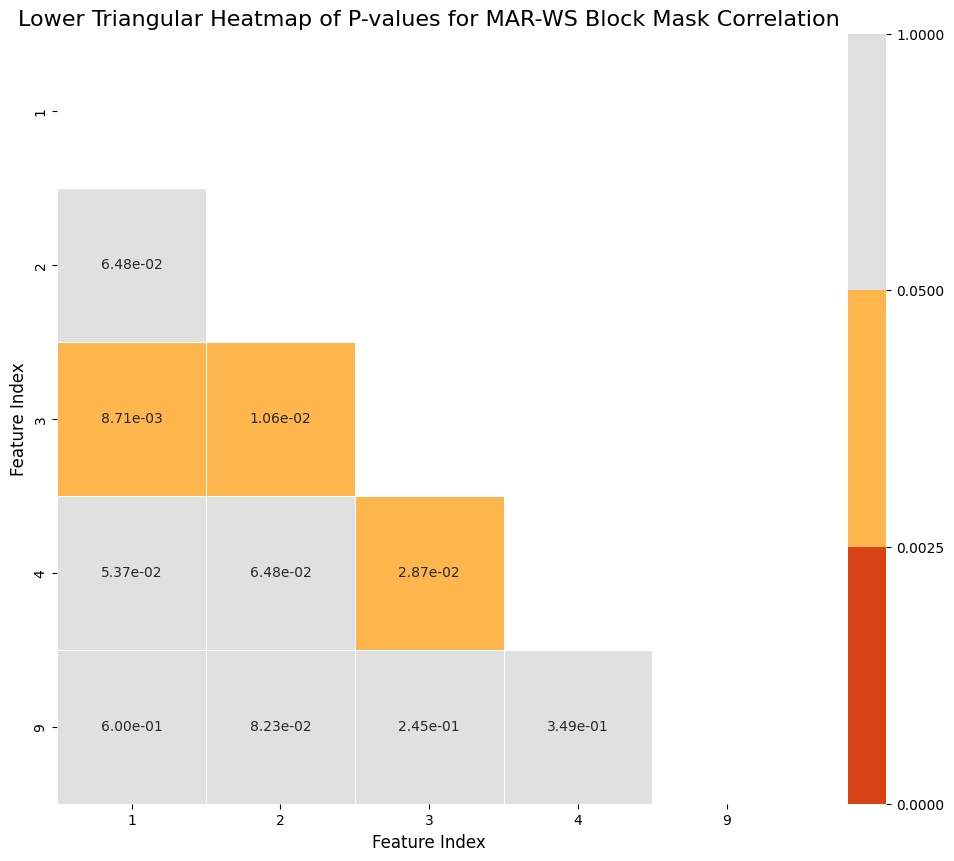

In [796]:
plot_mask_corr(R_mar_WSB, "MAR-WS Block")

#### MAR SS-Block (IX)

Percentage of generated missing values:  20.0  %


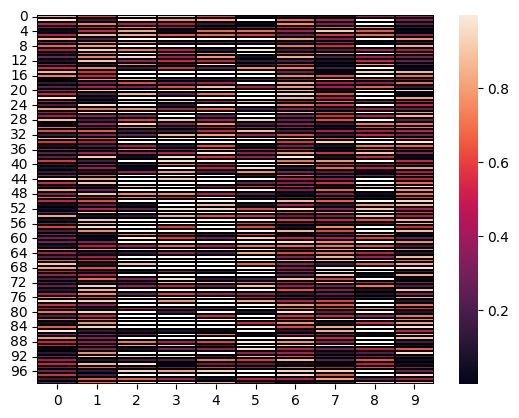

In [797]:
for i in num_tests:
    X_miss_mar_SSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MAR", p_obs=0.5, structured=True, weak=False, sequential=False)

    X_mar_SSB = X_miss_mar_SSB['X_incomp']
    R_mar_SSB = X_miss_mar_SSB['mask']

print("Percentage of generated missing values: ", (R_mar_SSB.sum())/np.prod(R_mar_SSB.shape)*100, " %")

ax = sns.heatmap(X_mar_SSB, mask=R_mar_SSB==1, linewidths=0.005, linecolor='black')

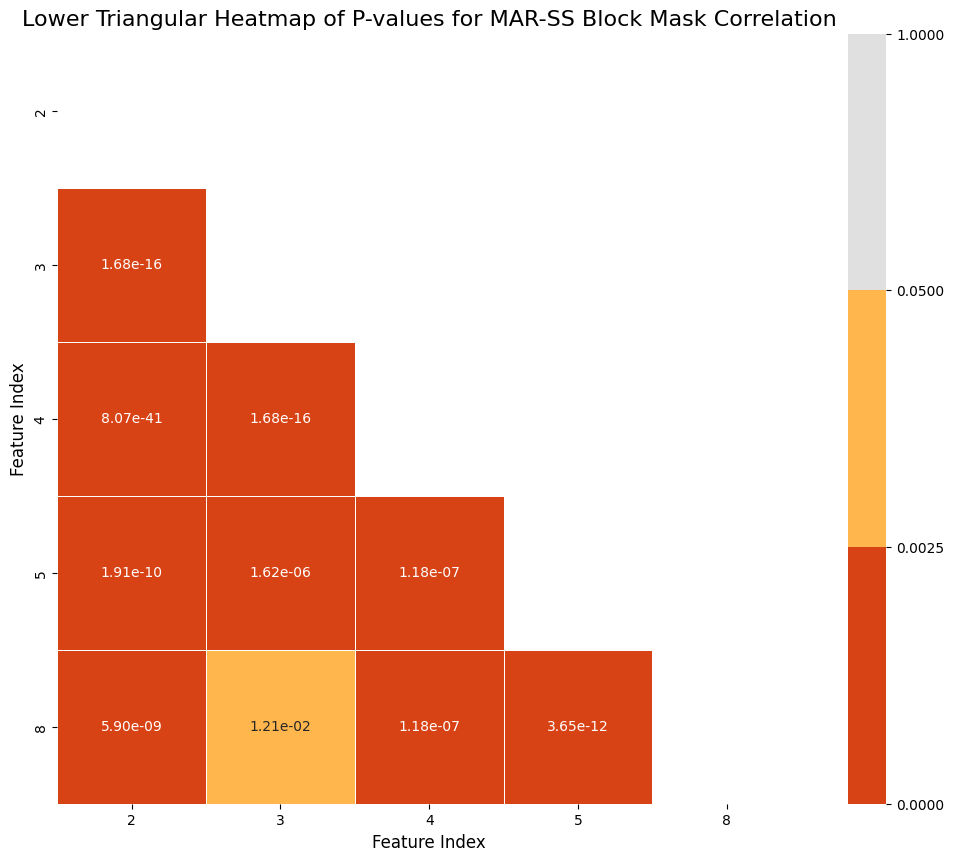

In [798]:
plot_mask_corr(R_mar_SSB, "MAR-SS Block")

#### MAR WS-Sequential (X)

Percentage of generated missing values:  21.099999999999998  %


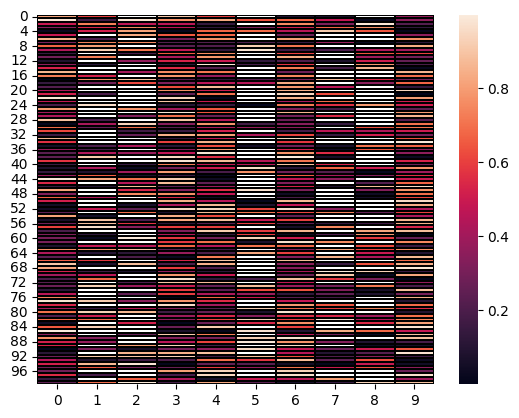

In [799]:
import warnings
warnings.filterwarnings('ignore')

for i in num_tests:
    X_miss_mar_WSS = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MAR", p_obs=0.5, structured=True, weak=True, sequential=True)

    X_mar_WSS = X_miss_mar_WSS['X_incomp']
    R_mar_WSS = X_miss_mar_WSS['mask']

print("Percentage of generated missing values: ", (R_mar_WSS.sum())/np.prod(R_mar_WSS.shape)*100, " %")

ax = sns.heatmap(X_mar_WSS, mask=R_mar_WSS==1, linewidths=0.005, linecolor='black')

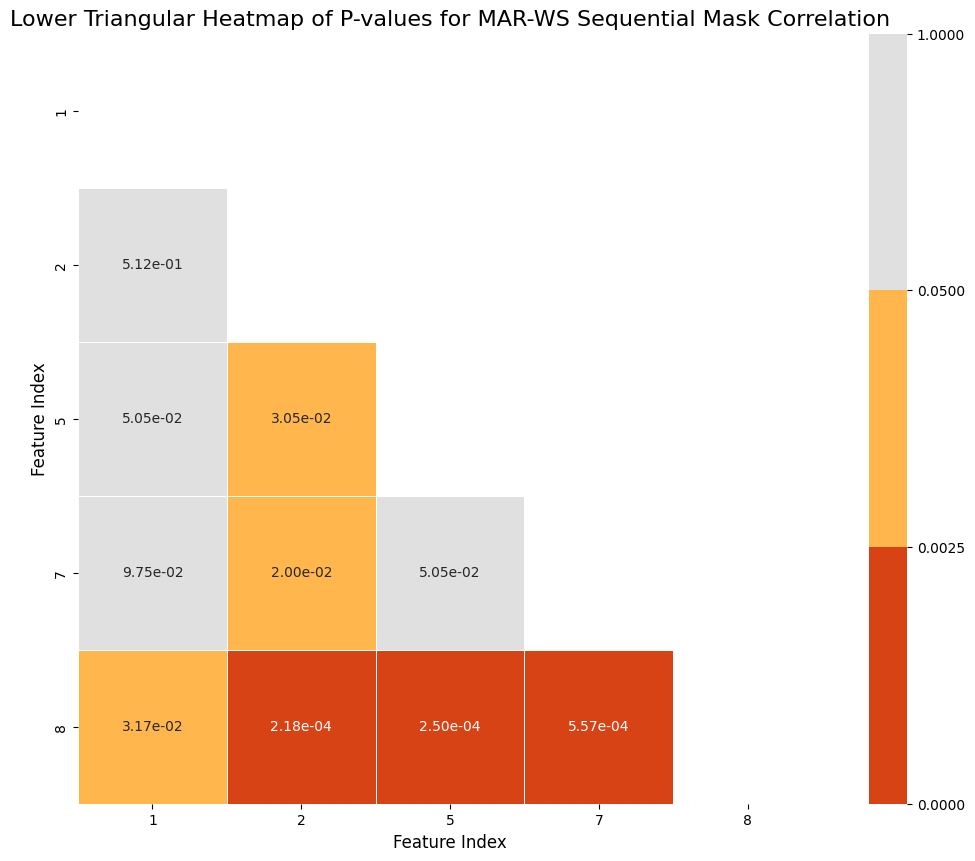

In [800]:
plot_mask_corr(R_mar_WSS, "MAR-WS Sequential")

#### MAR SS-Sequential (XI)

Percentage of generated missing values:  20.0  %


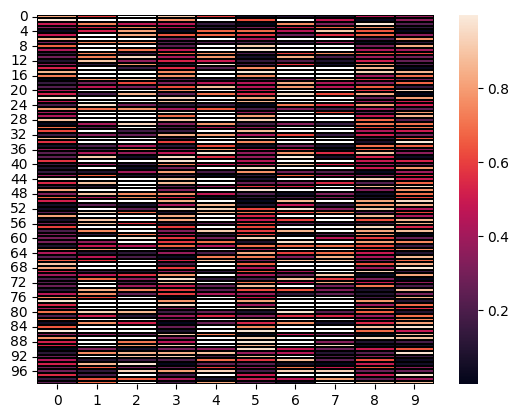

In [801]:
for i in num_tests:
    X_miss_mar_SSS = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MAR", p_obs=0.5, structured=True, weak=False, sequential=True)

    X_mar_SSS = X_miss_mar_SSS['X_incomp']
    R_mar_SSS = X_miss_mar_SSS['mask']

print("Percentage of generated missing values: ", (R_mar_SSS.sum())/np.prod(R_mar_SSS.shape)*100, " %")

ax = sns.heatmap(X_mar_SSS, mask=R_mar_SSS==1, linewidths=0.005, linecolor='black')

# MNAR

### MNAR Unstructured

#### MNAR Unstructured-Prob. (XII)

Percentage of generated missing values:  40.300000000000004  %


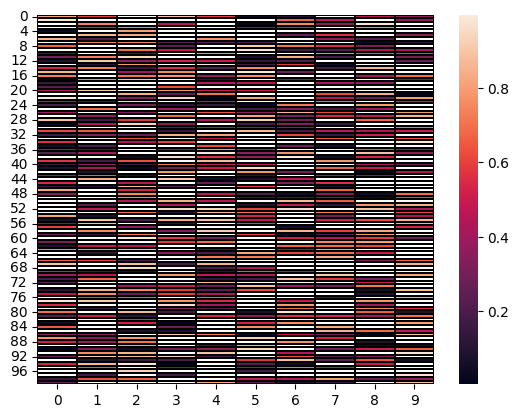

In [802]:
for i in num_tests:
    X_miss_mnar_UP = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MNAR", p_obs=0.5, structured=False, weak=True, sequential=True)

    X_mnar_UP = X_miss_mnar_UP['X_incomp']
    R_mnar_UP = X_miss_mnar_UP['mask']

print("Percentage of generated missing values: ", (R_mnar_UP.sum())/np.prod(R_mnar_UP.shape)*100, " %")

ax = sns.heatmap(X_mnar_UP, mask=R_mnar_UP==1, linewidths=0.005, linecolor='black')

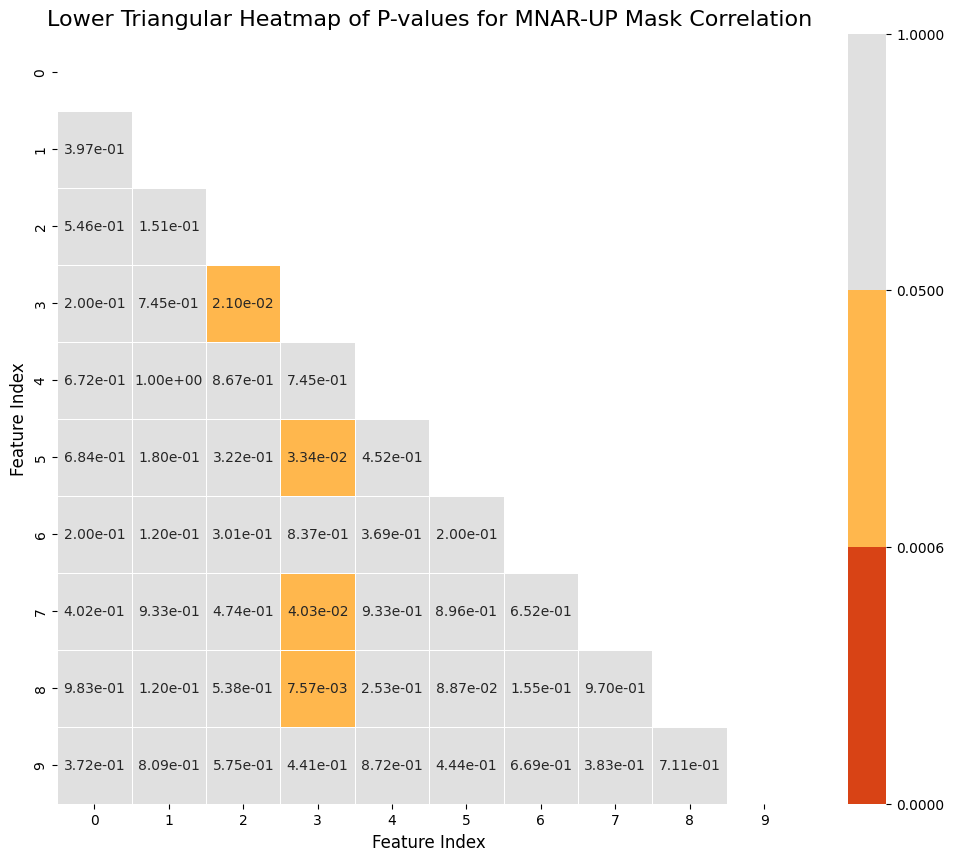

In [803]:
plot_mask_corr(R_mnar_UP, "MNAR-UP")

#### MNAR Unstructured-Det. (XIII)

Percentage of generated missing values:  40.1  %


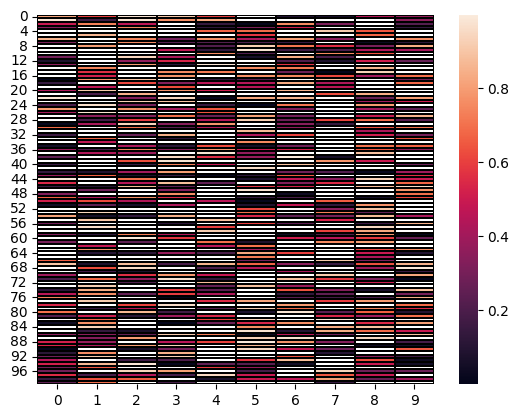

In [804]:
for i in num_tests:
    X_miss_mnar_UD = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MNAR", p_obs=0.5, structured=False, weak=False, sequential=True)

    X_mnar_UD = X_miss_mnar_UD['X_incomp']
    R_mnar_UD = X_miss_mnar_UD['mask']

print("Percentage of generated missing values: ", (R_mnar_UD.sum())/np.prod(R_mnar_UD.shape)*100, " %")

ax = sns.heatmap(X_mnar_UD, mask=R_mnar_UD==1, linewidths=0.005, linecolor='black')

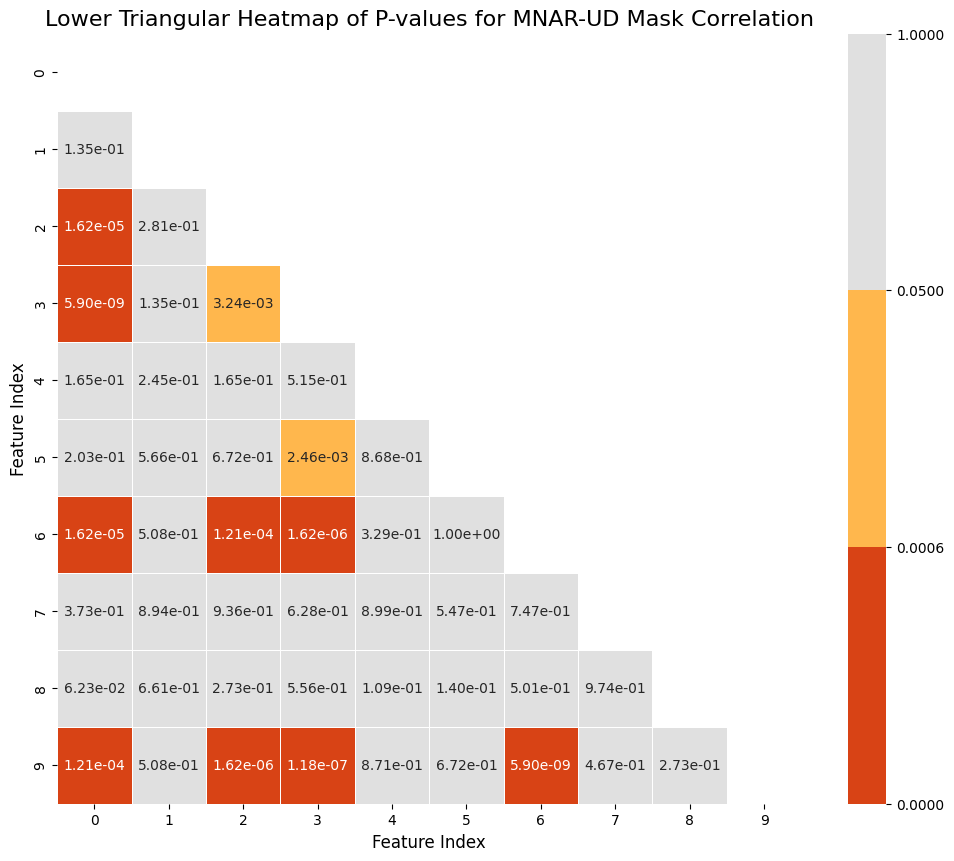

In [805]:
plot_mask_corr(R_mnar_UD, "MNAR-UD")

### MNAR Structured

#### MNAR WS-Block (XIV)

Percentage of generated missing values:  37.6  %


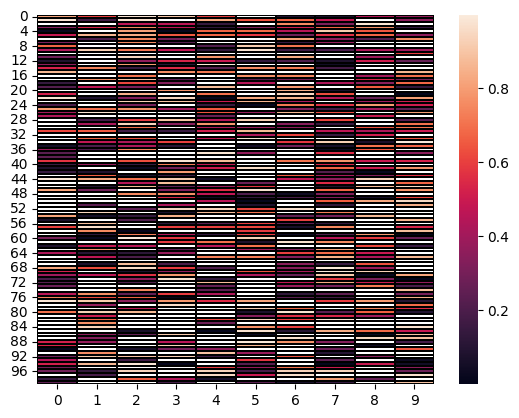

In [806]:
for i in num_tests:
    X_miss_mnar_WSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MNAR", p_obs=0.5, structured=True, weak=True, sequential=False)

    X_mnar_WSB = X_miss_mnar_WSB['X_incomp']
    R_mnar_WSB = X_miss_mnar_WSB['mask']

print("Percentage of generated missing values: ", (R_mnar_WSB.sum())/np.prod(R_mnar_WSB.shape)*100, " %")

ax = sns.heatmap(X_mnar_WSB, mask=R_mnar_WSB==1, linewidths=0.005, linecolor='black')

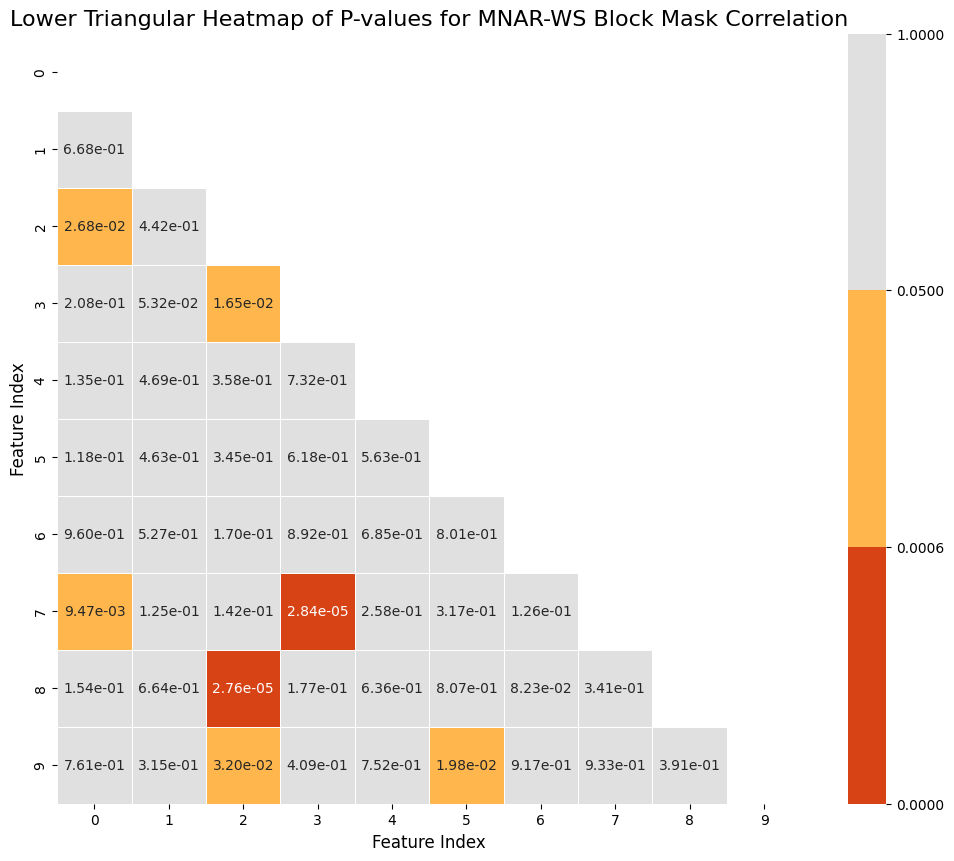

In [807]:
plot_mask_corr(R_mnar_WSB, "MNAR-WS Block")

#### MNAR SS-Block (XV)

Percentage of generated missing values:  40.0  %


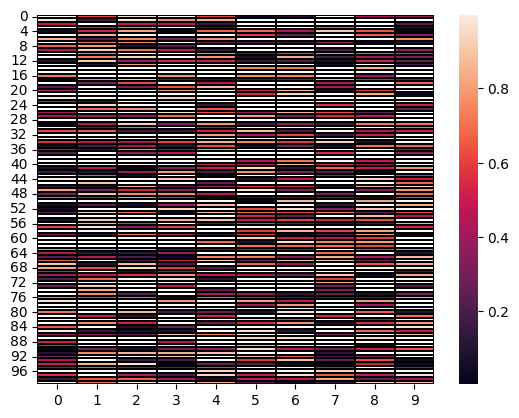

In [808]:
for i in num_tests:
    X_miss_mnar_SSB = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MNAR", p_obs=0.5, structured=True, weak=False, sequential=False)

    X_mnar_SSB = X_miss_mnar_SSB['X_incomp']
    R_mnar_SSB = X_miss_mnar_SSB['mask']

print("Percentage of generated missing values: ", (R_mnar_SSB.sum())/np.prod(R_mnar_SSB.shape)*100, " %")

ax = sns.heatmap(X_mnar_SSB, mask=R_mnar_SSB==1, linewidths=0.005, linecolor='black')

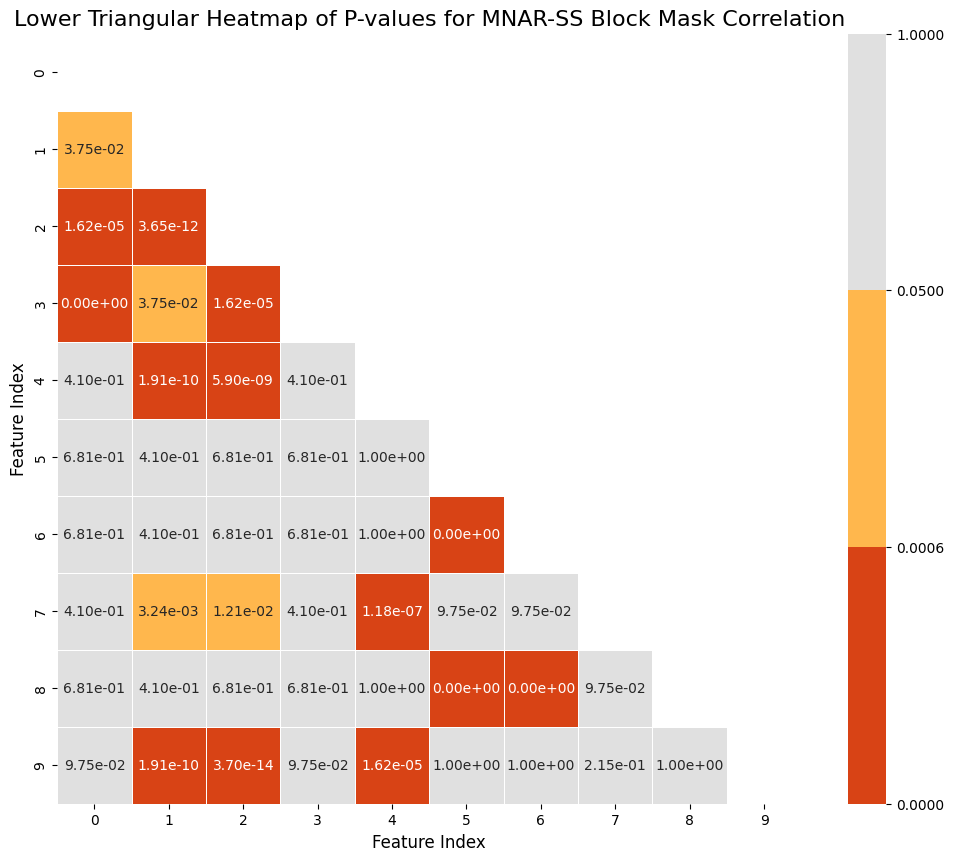

In [809]:
plot_mask_corr(R_mnar_SSB, "MNAR-SS Block")

#### MNAR WS-Sequential (XVI)

Percentage of generated missing values:  41.199999999999996  %


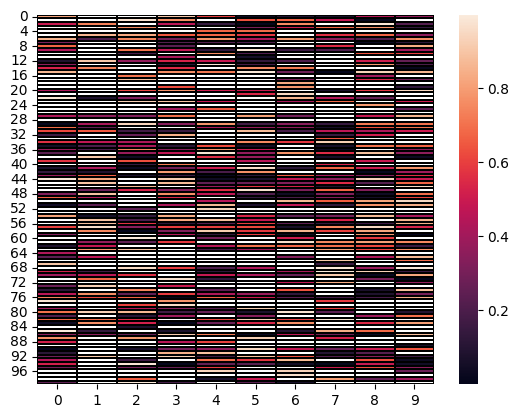

In [810]:
for i in num_tests:
    X_miss_mnar_WSS = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MNAR", p_obs=0.5, structured=True, weak=True, sequential=True)

    X_mnar_WSS = X_miss_mnar_WSS['X_incomp']
    R_mnar_WSS = X_miss_mnar_WSS['mask']

print("Percentage of generated missing values: ", (R_mnar_WSS.sum())/np.prod(R_mnar_WSS.shape)*100, " %")

ax = sns.heatmap(X_mnar_WSS, mask=R_mnar_WSS==1, linewidths=0.005, linecolor='black')

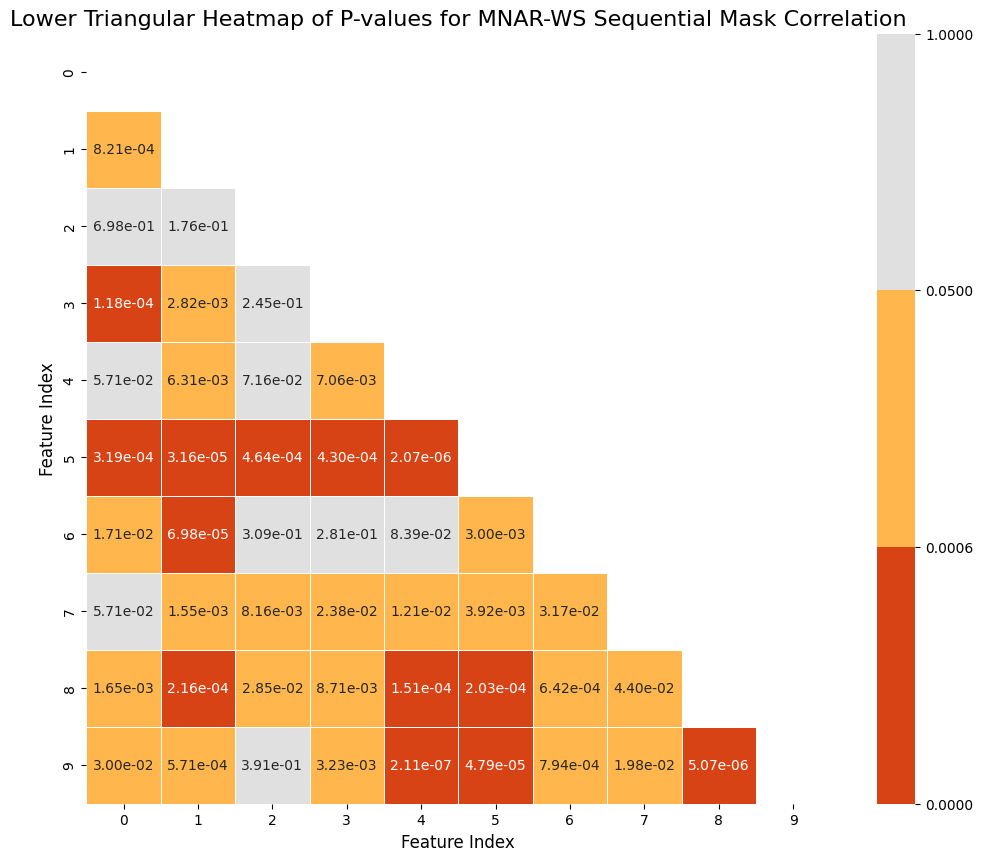

In [811]:
plot_mask_corr(R_mnar_WSS, "MNAR-WS Sequential")

#### MNAR SS-Sequential (XVII)

Percentage of generated missing values:  40.1  %


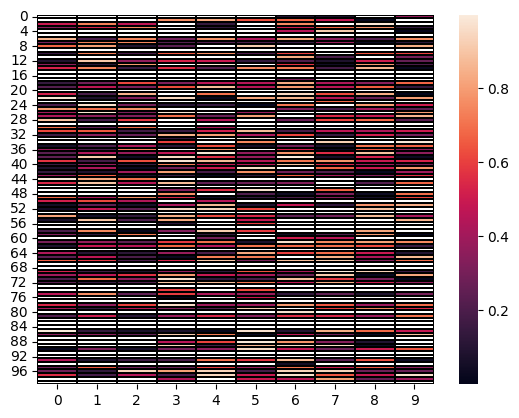

In [812]:
for i in num_tests:
    X_miss_mnar_SSS = simulate_nan(X_complete_cont, p_miss=0.4, mecha="MNAR", p_obs=0.5, structured=True, weak=False, sequential=True)

    X_mnar_SSS = X_miss_mnar_SSS['X_incomp']
    R_mnar_SSS = X_miss_mnar_SSS['mask']

print("Percentage of generated missing values: ", (R_mnar_SSS.sum())/np.prod(R_mnar_SSS.shape)*100, " %")

ax = sns.heatmap(X_mnar_SSS, mask=R_mnar_SSS==1, linewidths=0.005, linecolor='black')

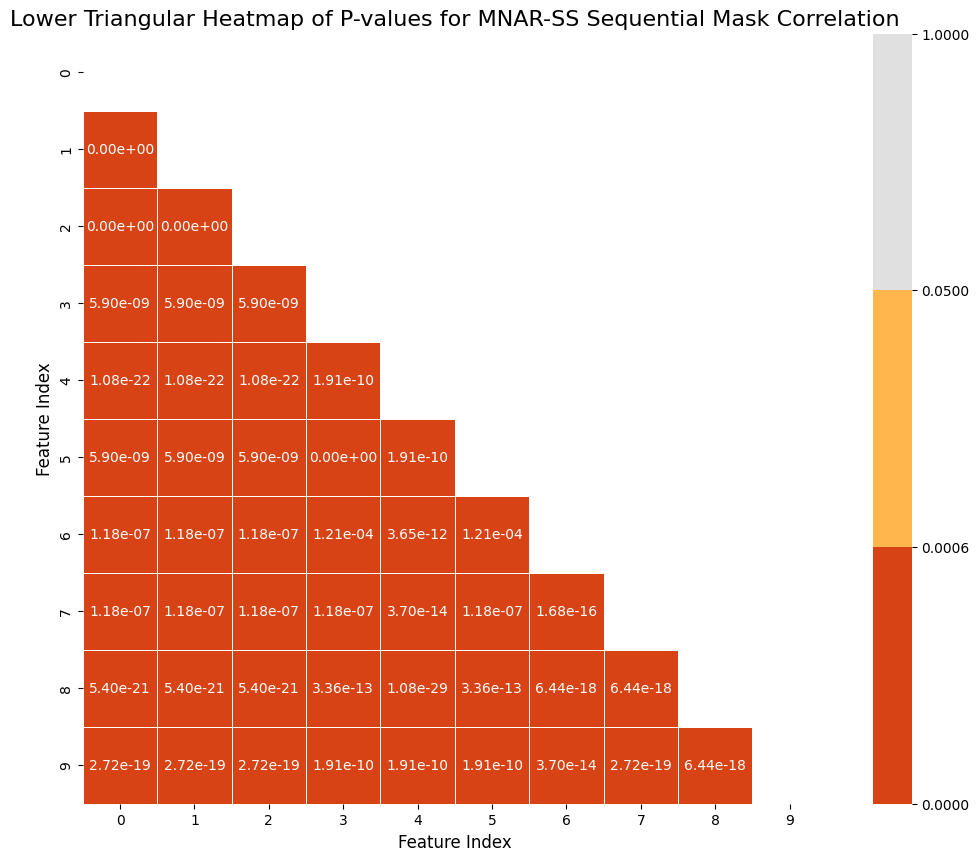

In [813]:
plot_mask_corr(R_mnar_SSS, "MNAR-SS Sequential")